[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PongthepGeo/ML_22/blob/master/07_data_visualization.ipynb)

### Data visualization

Data visualization using **matplotlib** library is one of the most popular visualization in open source community. There are other libraries available such as plotly, seaborn, GGplot, altair, bokeh, and pygal. 

```bat
pip install matplotlib
pip install seaborn
```

#### 1. General plot function

Text(0, 0.5, 'amplitude')

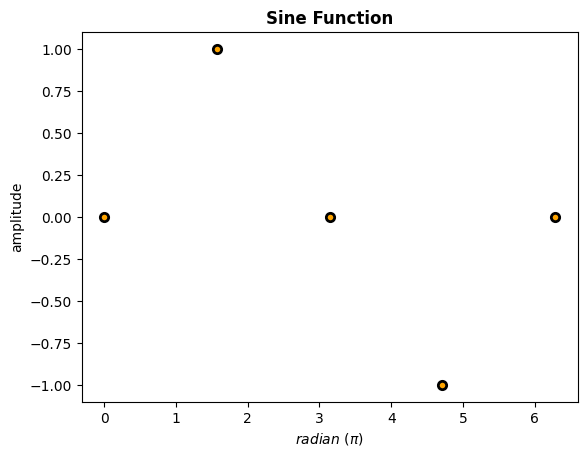

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

angle = np.array([0, 90, 180, 270, 360])
x = np.deg2rad(angle) # convert degrees to radians
y = np.sin(x) # need radian as input

plt.scatter(x, y, color='orange', edgecolors='black', linewidths=2)
plt.title('Sine Function', fontweight='bold')
plt.xlabel(r'$radian\ (\pi)$')
plt.ylabel('amplitude')

##### Exercise: try to add more data points. The outcome will facilitate a discreate sine function to be more continuous form.

We can call <font color="#EAC7B9"> **plot** </font> function to plot a line, controlling color and line style using arguments showning below. More details can be found [here](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html). Matplotlib also provides more plotting options such as axis, legend, and title.


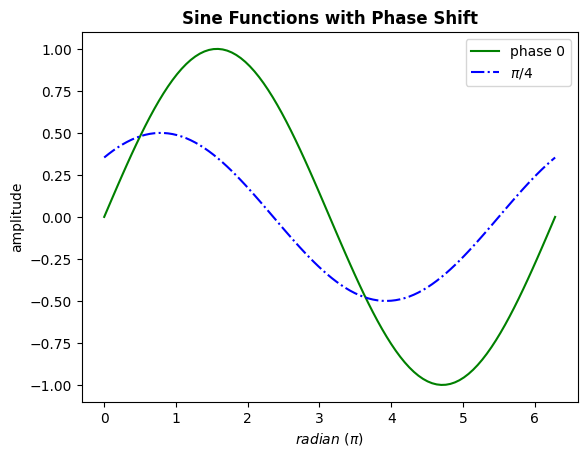

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

angle = np.linspace(0, 360, 100)
x = np.deg2rad(angle) # convert degrees to radians
y_1 = np.sin(x) # need radian as input
y_2 = 0.5*np.sin(x+(np.pi/4)) # need radian as input

plt.plot(x, y_1, linestyle='solid', color='green')
plt.plot(x, y_2, linestyle='dashdot', color='blue')
plt.title('Sine Functions with Phase Shift', fontweight='bold')
plt.xlabel(r'$radian\ (\pi)$')
plt.ylabel('amplitude')
plt.legend(['phase 0', r'$\pi/4$'])

#### 2. Pandas

Typically, Pandas have built-in plot functions, but we found that transforming the data from Pandas dataframe into Python will have more control.

Let's import one example of well log data and visualize a scattering plot between column name <font color="#EAC7B9"> **GR** </font> and <font color="#EAC7B9"> **ILD_log10** </font>.

```bash
pip install pandas
```

In [12]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
data = pd.read_csv('../datasets/welllog_csv/welllogs.csv')

Exploring data.

In [14]:
# NOTE explore data information
print(data.describe())
# NOTE check number of NaN
null_value_stats = data.isnull().sum(axis=0)
print(null_value_stats[null_value_stats != 0])
# NOTE check data types
print(data.dtypes)
# NOTE check well names
well_names = data['Well Name'].unique()
print(well_names)

            Facies        Depth           GR    ILD_log10     DeltaPHI  \
count  4149.000000  4149.000000  4149.000000  4149.000000  4149.000000   
mean      4.503254  2906.867438    64.933985     0.659566     4.402484   
std       2.474324   133.300164    30.302530     0.252703     5.274947   
min       1.000000  2573.500000    10.149000    -0.025949   -21.832000   
25%       2.000000  2821.500000    44.730000     0.498000     1.600000   
50%       4.000000  2932.500000    64.990000     0.639000     4.300000   
75%       6.000000  3007.000000    79.438000     0.822000     7.500000   
max       9.000000  3138.000000   361.150000     1.800000    19.312000   

             PHIND           PE  
count  4149.000000  3232.000000  
mean     13.201066     3.725014  
std       7.132846     0.896152  
min       0.550000     0.200000  
25%       8.500000     3.100000  
50%      12.020000     3.551500  
75%      16.050000     4.300000  
max      84.400000     8.094000  
PE    917
dtype: int64
Faci

Text(0, 0.5, 'Resistivity')

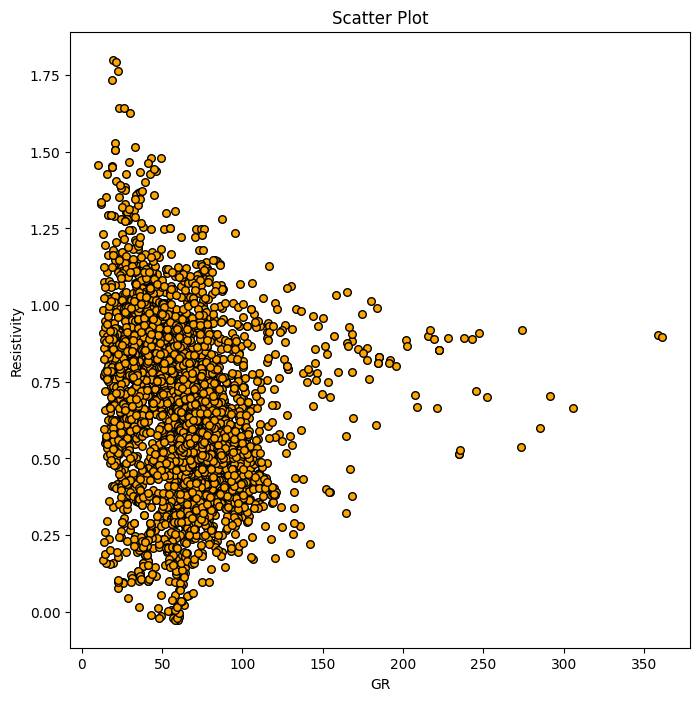

In [19]:
plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.scatter(data['GR'], data['ILD_log10'], s=30, color='orange', edgecolors='black')
plt.title('Scatter Plot')
plt.xlabel('GR')
plt.ylabel('Resistivity')

Python allows multiple data to share in one figure frame. This example demonstrates overlay beween well logs <font color="#EAC7B9"> **DeltaPHI**/**GR** </font> and <font color="#EAC7B9"> **PHIND**/**GR** </font>.

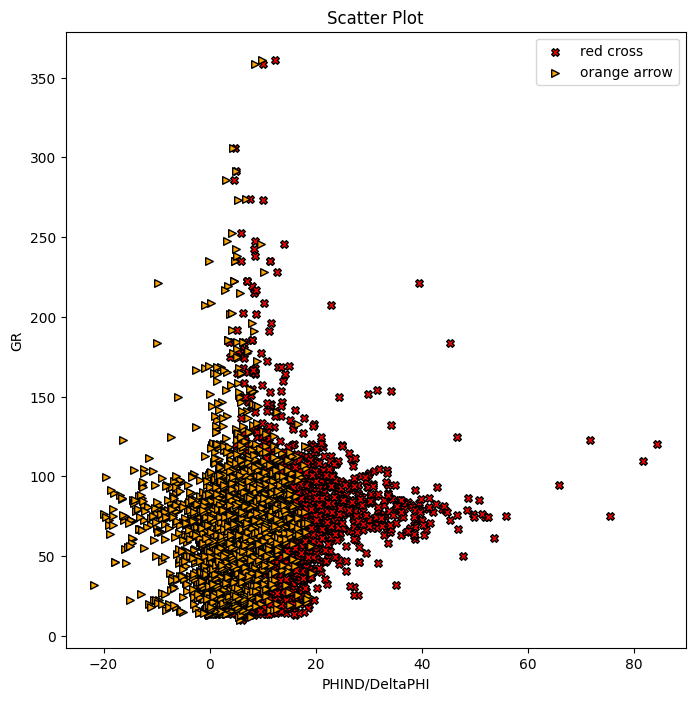

In [21]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../datasets/welllog_csv/welllogs.csv')

# plt.close()
plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.scatter(data['PHIND'], data['GR'], s=30, edgecolors='black', c='red', alpha=1.0, marker='X')
plt.scatter(data['DeltaPHI'], data['GR'], s=30, edgecolors='black', c='orange', alpha=1.0, marker='>')
plt.title('Scatter Plot')
plt.xlabel('PHIND/DeltaPHI')
plt.ylabel('GR')
plt.legend(['red cross', 'orange arrow'])

#### 3. Useful scientific plots

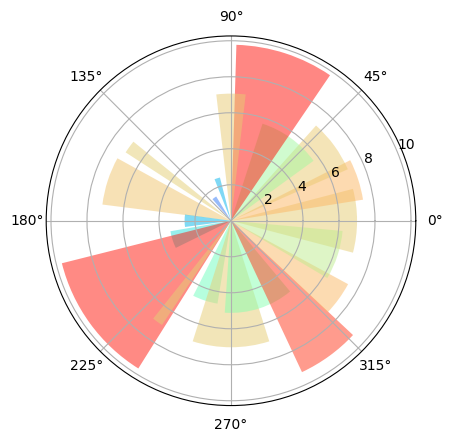

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.rainbow(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

```bash
pip install seaborn
python -m pip install statsmodels 
```

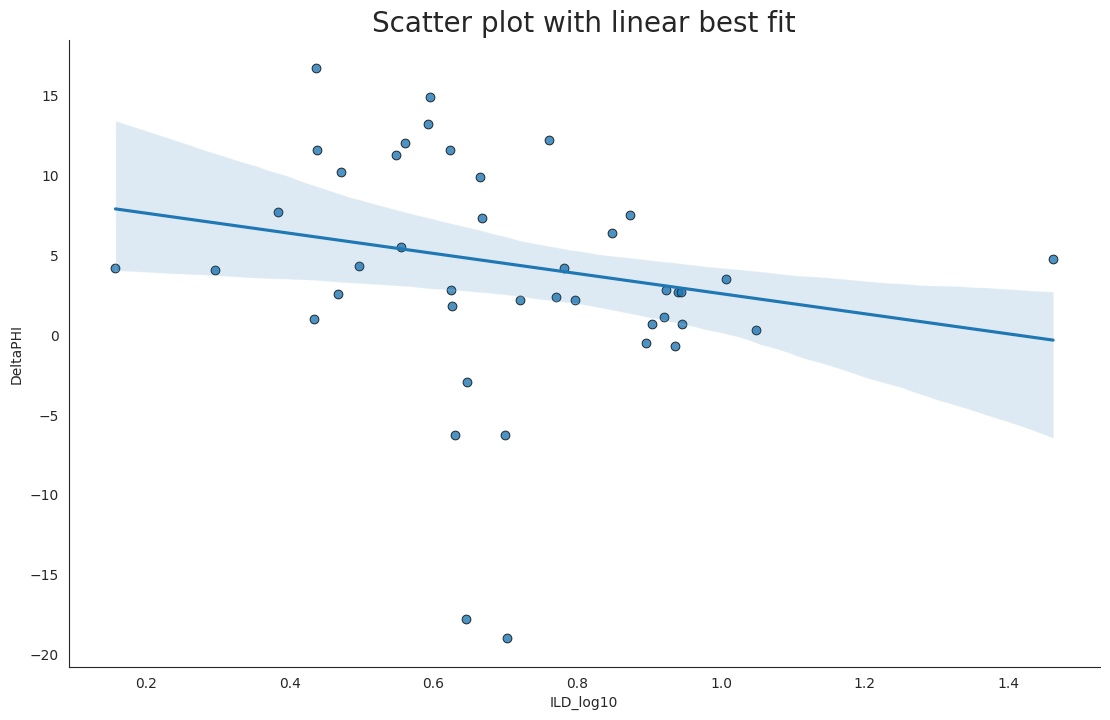

In [23]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../datasets/welllog_csv/welllogs.csv')

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="ILD_log10", y="DeltaPHI", data=data.iloc[::100, 5:7], 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=40, linewidths=.7, edgecolors='black'))

# Decorations
# gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatter plot with linear best fit", fontsize=20)
plt.show()

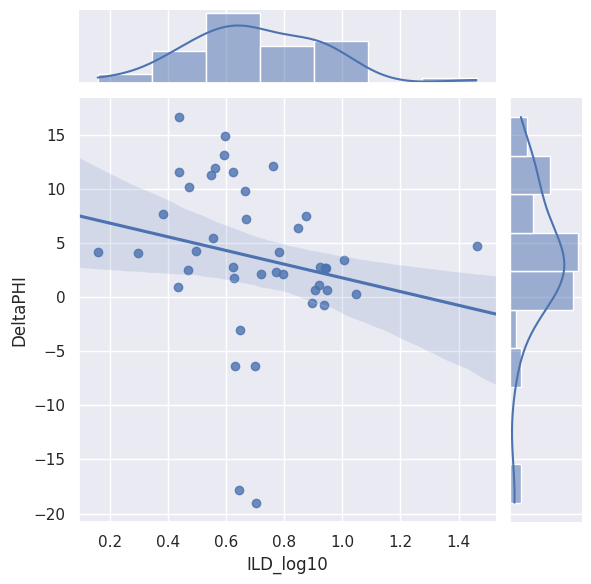

In [24]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

data = pd.read_csv('../datasets/welllog_csv/welllogs.csv')

gridobj = sns.jointplot(x="ILD_log10", y="DeltaPHI", data=data.iloc[::100, 5:7], kind="reg", truncate=False)  
plt.show()

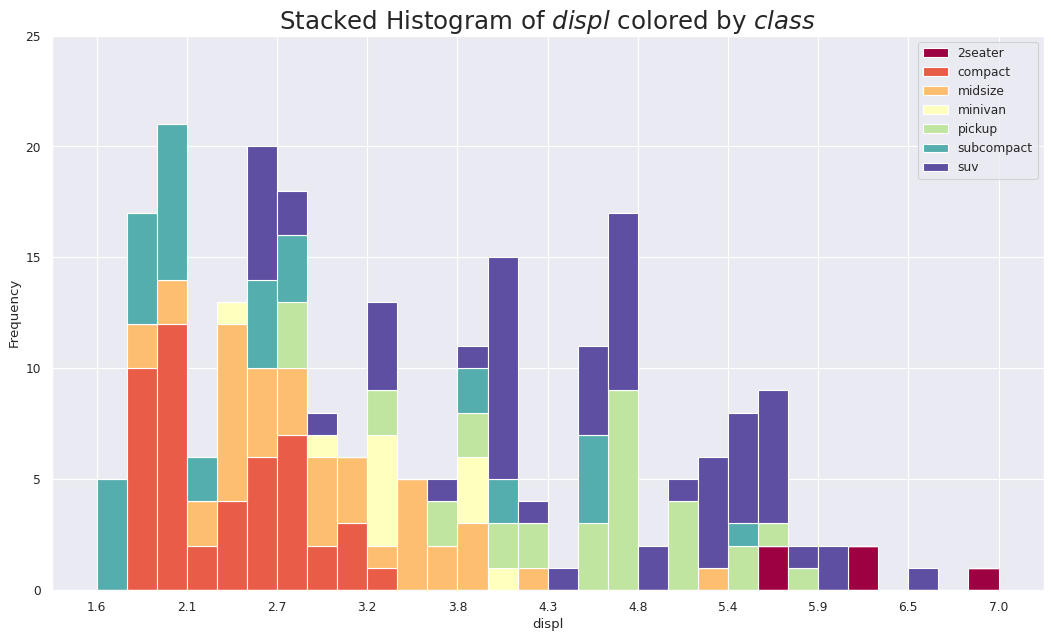

In [25]:
import numpy as np

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

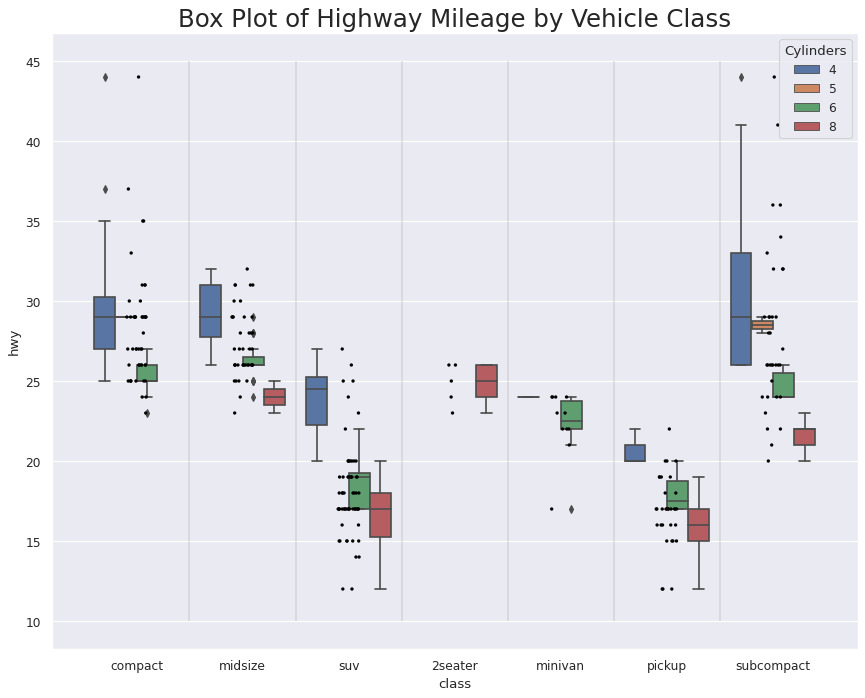

In [26]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

##### These two data visualizations represent well logs.

<p align="center">
  <img width="500" src="pictures/scatter_9_facies.png">
</p>

<p align="center">
  <img width="500" src="pictures/Newby.svg">
</p>